In [2]:
import numpy as np

from dowhy import CausalModel
import dowhy.datasets

In [ ]:
data = dowhy.datasets.linear_dataset(
        beta = 10,          #True causal effect
        num_common_causes = 5,
        num_instruments = 2,
        num_effect_modifiers = 1,
        num_samples = 5000,
        treatment_is_binary = True,
        stddev_treatment_noise = 10,
        num_discrete_common_causes = 1
    )

df = data["df"]

df.head()

['v0']


,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,0.299396,0.0,0.178228,0.823992,0.153768,-0.723078,1.143617,2,True,25.631722
1,0.680433,0.0,0.570528,0.196518,1.702120,-1.060586,-0.518142,2,True,23.415704
2,1.082148,0.0,0.556832,0.513850,0.448296,1.950619,0.582676,2,True,25.237497
3,1.030682,1.0,0.573100,0.742595,0.629553,-1.394578,-1.211046,0,True,12.234818
4,0.651892,0.0,0.230117,0.841191,0.974757,0.721126,1.402134,0,False,9.327182


graph[directed 1node[ id "y" label "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ id "W4" label "W4"]node[ id "Z0" label "Z0"] node[ id "Z1" label "Z1"]node[ id "v0" label "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"] edge[ source "W1" target "v0"] edge[ source "W2" target "v0"] edge[ source "W3" target "v0"] edge[ source "W4" target "v0"]edge[ source "Z0" target "v0"] edge[ source "Z1" target "v0"]edge[ source "W0" target "y"] edge[ source "W1" target "y"] edge[ source "W2" target "y"] edge[ source "W3" target "y"] edge[ source "W4" target "y"]node[ id "X0" label "X0"] edge[ source "X0" target "y"]]


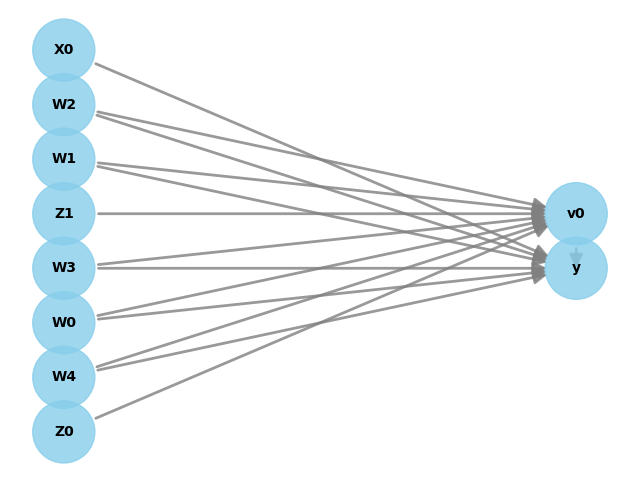

In [ ]:
model = CausalModel(
    data = df,
    treatment = data["treatment_name"],
    outcome = data["outcome_name"],
    graph = data["gml_graph"]
)

model.view_model()

In [5]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable = True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W3,W2,W1,W0,W4])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W2,W1,W0,W4,U) = P(y|v0,W3,W2,W1,W0,W4)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                              -1⎤
 ⎢    d        ⎛    d          ⎞  ⎥
E⎢─────────(y)⋅⎜─────────([v₀])⎟  ⎥
 ⎣d[Z₀  Z₁]    ⎝d[Z₀  Z₁]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
  d                       
─────(E[y|W2,W3,W1,W0,W4])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W2,W3,W1,W0,W4,U) = P(y|v0,W2,W3,W1,W0,W4)



In [6]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W3,W2,W1,W0,W4])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W2,W1,W0,W4,U) = P(y|v0,W3,W2,W1,W0,W4)

## Realized estimand
b: y~v0+W3+W2+W1+W0+W4
Target units: ate

## Estimate
Mean value: 9.568497269163222

